# Ham or Spam real or spam 

In [1]:
!pip install wordcloud

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.columns=['Class','Text']

In [9]:
df

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

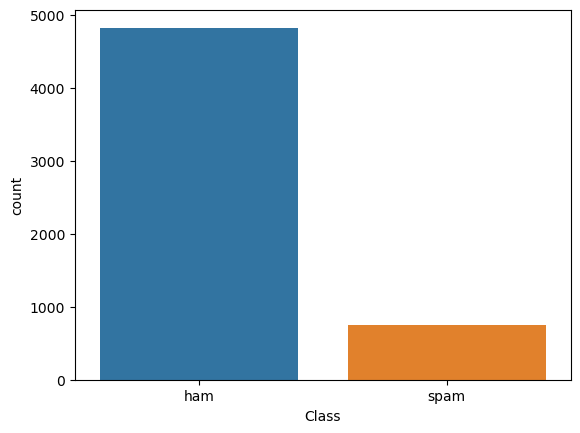

In [11]:
sns.countplot(x=df['Class'])

In [12]:
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [13]:
d={'ham':0,'spam':1}

In [14]:
df['Class']=df['Class'].map(d)#for döngüsü modern versiyon 

In [15]:
df

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','')
df['Text']=df['Text'].str.replace('\n','')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\r','')

In [17]:
df

,Class,Text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u...
5568,0,will ì_ b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    #mask=np.array(Image.open('')) bu yazıları herhangi bir görselin içine yazma işi 
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    

In [20]:
ham=df[df['Class']==0]['Text']
spam=df[df['Class']==1]['Text']

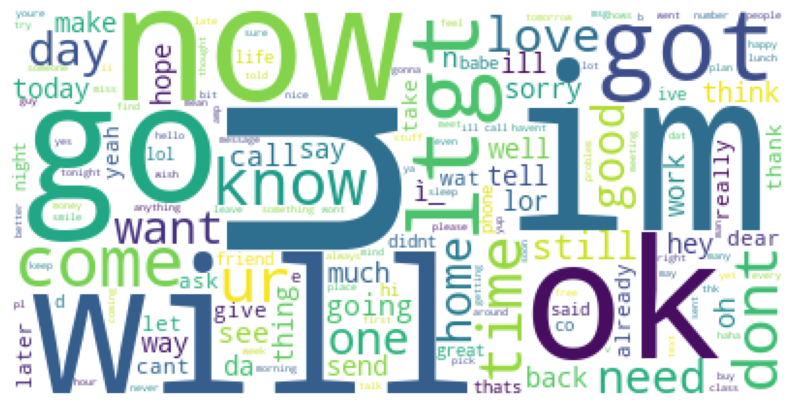

In [21]:
wc(ham,'white')

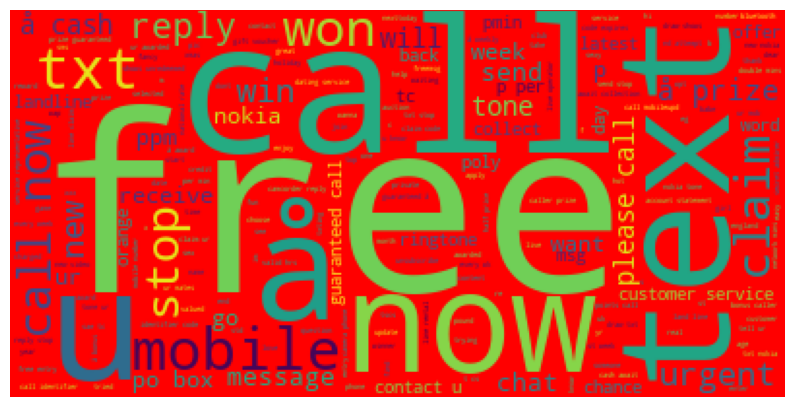

In [22]:
wc(spam,'red')

In [23]:
x=df['Text']
y=df['Class']

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
from textblob import TextBlob

In [27]:
from nltk.stem import PorterStemmer 
pr=PorterStemmer()

In [28]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [29]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemmafn)#döndü dönmedi 

In [30]:
x=vect.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [32]:
nb=MultinomialNB()

In [33]:
model=nb.fit(x_train,y_train)

In [34]:
tahmin=model.predict(x_test)

In [35]:
accuracy_score(tahmin,y_test)

0.9766816143497757

In [36]:
tahmin

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)